In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Feature Selection

In [2]:
raw_data = pd.read_csv('matchesall2014-2020.csv')
raw_data

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,35.0,20.0,4.0,0.0,0.0,1,2,2,1,2014
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,42.0,9.0,1.0,0.0,0.0,2,2,2,2,2014
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,28.0,10.0,1.0,0.0,0.0,2,2,2,2,2014
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,27.0,10.0,0.0,0.0,1.0,0,1,1,0,2014
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,56.0,10.0,2.0,0.0,0.0,0,1,1,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,2655,ARSENAL,BRIGHTON,2-0,0-0,4.5,7.3,5.5,54,46,...,18.0,8.0,0.0,0.0,0.0,2,0,0,2,2020
2656,2656,SHEFFIELD UTD,BURNLEY,1-0,1-0,3.6,6.2,5.8,43,57,...,19.0,1.0,1.0,0.0,0.0,1,0,0,1,2020
2657,2657,LEICESTER CITY,TOTTENHAM,2-4,1-1,8.7,6.0,6.7,47,53,...,13.0,8.0,2.0,0.0,0.0,2,4,4,2,2020
2658,2658,WEST HAM,SOUTHAMPTON,3-0,2-0,5.8,7.3,5.2,37,63,...,9.0,9.0,3.0,0.0,0.0,3,0,0,3,2020


## Checking for Outliers With PDFs

In [ ]:
 
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(raw_data['Price'])

In [3]:
def feature(premier_df):
    h_sc=[]
    a_sc = []
    h_co = []
    a_co = []
    for i in range(0, len(premier_df), 1):
        score = premier_df['Score'][i]
        score = score.split('-')
        h_sc.append(score[0])
        a_co.append(score[0])
        a_sc.append(score[1])
        h_co.append(score[1])
    premier_df['Home Team Goals Scored'] = h_sc
    premier_df['Away Team Goals Scored'] = a_sc
    premier_df['Home Team Goals Conceeded'] = h_co
    premier_df['Away Team Goals Conceeded'] = a_co
    return premier_df

In [4]:
data_preprocessed = feature(raw_data)

In [5]:
data_preprocessed

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,35.0,20.0,4.0,0.0,0.0,1,2,2,1,2014
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,42.0,9.0,1.0,0.0,0.0,2,2,2,2,2014
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,28.0,10.0,1.0,0.0,0.0,2,2,2,2,2014
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,27.0,10.0,0.0,0.0,1.0,0,1,1,0,2014
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,56.0,10.0,2.0,0.0,0.0,0,1,1,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,2655,ARSENAL,BRIGHTON,2-0,0-0,4.5,7.3,5.5,54,46,...,18.0,8.0,0.0,0.0,0.0,2,0,0,2,2020
2656,2656,SHEFFIELD UTD,BURNLEY,1-0,1-0,3.6,6.2,5.8,43,57,...,19.0,1.0,1.0,0.0,0.0,1,0,0,1,2020
2657,2657,LEICESTER CITY,TOTTENHAM,2-4,1-1,8.7,6.0,6.7,47,53,...,13.0,8.0,2.0,0.0,0.0,2,4,4,2,2020
2658,2658,WEST HAM,SOUTHAMPTON,3-0,2-0,5.8,7.3,5.2,37,63,...,9.0,9.0,3.0,0.0,0.0,3,0,0,3,2020


In [81]:
data_preprocessed.isnull().sum()

Unnamed: 0                       0
Home Team                        0
Away Team                        0
Score                            0
Half Time Score                  0
Match Excitement                 0
Home Team Rating                 0
Away Team Rating                 0
Home Team Possession %           0
Away Team Possession %           0
Home Team Off Target Shots       0
Home Team On Target Shots        0
Home Team Total Shots            0
Home Team Blocked Shots          0
Home Team Corners                0
Home Team Throw Ins              0
Home Team Pass Success %         0
Home Team Aerials Won            0
Home Team Clearances             0
Home Team Fouls                  0
Home Team Yellow Cards           0
Home Team Second Yellow Cards    0
Home Team Red Cards              0
Away Team Off Target Shots       0
Away Team On Target Shots        0
Away Team Total Shots            0
Away Team Blocked Shots          0
Away Team Corners                0
Away Team Throw Ins 

In [82]:
data_preprocessed.describe(include='all')

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
count,2660.000000,2660,2660,2660,2660,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,...,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660,2660,2660,2660,2660.000000
unique,NaN,31,31,47,24,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10,9,9,10,NaN
top,NaN,MAN UTD,ARSENAL,1-1,0-0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
freq,NaN,133,133,282,800,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,859,882,882,859,NaN
mean,1329.500000,NaN,NaN,NaN,NaN,5.348571,6.476692,6.238797,51.321429,48.678571,...,26.070301,10.986466,1.757143,0.035338,0.040602,NaN,NaN,NaN,NaN,2017.000000
std,768.020182,NaN,NaN,NaN,NaN,1.693194,0.995476,0.990078,12.403523,12.403523,...,11.327858,3.523387,1.281851,0.186694,0.206709,NaN,NaN,NaN,NaN,2.000376
min,0.000000,NaN,NaN,NaN,NaN,1.700000,2.400000,1.300000,18.000000,17.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,2014.000000
25%,664.750000,NaN,NaN,NaN,NaN,4.100000,5.800000,5.600000,42.000000,39.000000,...,18.000000,9.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,2015.000000
50%,1329.500000,NaN,NaN,NaN,NaN,5.300000,6.500000,6.200000,51.000000,49.000000,...,25.000000,11.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,2017.000000
75%,1994.250000,NaN,NaN,NaN,NaN,6.400000,7.100000,6.900000,61.000000,58.000000,...,33.000000,13.000000,3.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,2019.000000


## EDA

## Checking for Outliers With PDFs

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

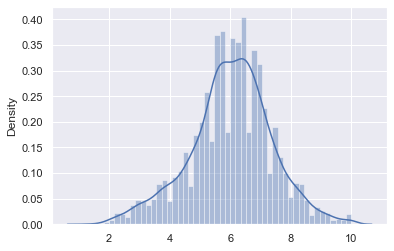

In [78]:
 
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_preprocessed[['Match Excitement','Home Team Rating','Away Team Rating']])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

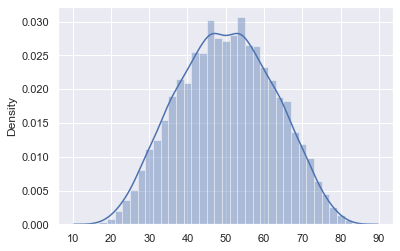

In [79]:
sns.distplot(data_preprocessed[['Home Team Possession %','Away Team Possession %']])

In [13]:
data_dummies=pd.get_dummies(data_preprocessed[['Home Team','Away Team']],drop_first=True)
data_dummies

,Home Team_ASTON VILLA,Home Team_BOURNEMOUTH,Home Team_BRIGHTON,Home Team_BURNLEY,Home Team_CARDIFF,Home Team_CHELSEA,Home Team_CRYSTAL PALACE,Home Team_EVERTON,Home Team_FULHAM,Home Team_HUDDERSFIELD,...,Away Team_SHEFFIELD UTD,Away Team_SOUTHAMPTON,Away Team_STOKE,Away Team_SUNDERLAND,Away Team_SWANSEA,Away Team_TOTTENHAM,Away Team_WATFORD,Away Team_WEST BROM,Away Team_WEST HAM,Away Team_WOLVES
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2658,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
inputs = data_preprocessed.drop(['Unnamed: 0',
                                 'Home Team',
                                 'Away Team',
                                 'Score',
                                 'Half Time Score',
                                 'Home Team Goals Conceeded',
                                 'Away Team Goals Conceeded'],axis=1)

In [12]:
inputs

,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,Home Team Corners,...,Away Team Pass Success %,Away Team Aerials Won,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,year
0,5.9,5.6,7.6,60,40,5.0,5.0,14.0,4.0,4.0,...,80.0,10.0,35.0,20.0,4.0,0.0,0.0,1,2,2014
1,7.3,6.5,7.4,58,42,5.0,5.0,10.0,0.0,6.0,...,75.0,15.0,42.0,9.0,1.0,0.0,0.0,2,2,2014
2,7.0,6.5,6.3,37,63,5.0,3.0,11.0,3.0,3.0,...,84.0,14.0,28.0,10.0,1.0,0.0,0.0,2,2,2014
3,4.8,5.9,6.4,47,53,10.0,4.0,18.0,4.0,8.0,...,80.0,12.0,27.0,10.0,0.0,0.0,1.0,0,1,2014
4,3.8,5.7,6.6,51,49,7.0,6.0,19.0,6.0,8.0,...,76.0,15.0,56.0,10.0,2.0,0.0,0.0,0,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,4.5,7.3,5.5,54,46,7.0,5.0,16.0,4.0,11.0,...,86.0,2.0,18.0,8.0,0.0,0.0,0.0,2,0,2020
2656,3.6,6.2,5.8,43,57,7.0,3.0,12.0,2.0,8.0,...,73.0,44.0,19.0,1.0,1.0,0.0,0.0,1,0,2020
2657,8.7,6.0,6.7,47,53,2.0,6.0,10.0,2.0,8.0,...,81.0,14.0,13.0,8.0,2.0,0.0,0.0,2,4,2020
2658,5.8,7.3,5.2,37,63,6.0,7.0,14.0,1.0,2.0,...,80.0,11.0,9.0,9.0,3.0,0.0,0.0,3,0,2020


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)
inputs_scaled

array([[ 0.32573479, -0.88084165,  1.37510283, ..., -0.3899312 ,
         0.6707295 , -1.5       ],
       [ 1.15272985,  0.0234186 ,  1.17306054, ...,  0.38295777,
         0.6707295 , -1.5       ],
       [ 0.97551662,  0.0234186 ,  0.06182798, ...,  0.38295777,
         0.6707295 , -1.5       ],
       ...,
       [ 1.97972491, -0.4789482 ,  0.46591255, ...,  0.38295777,
         2.36265978,  1.5       ],
       [ 0.26666371,  0.82720549, -1.04940459, ...,  1.15584674,
        -1.02120077,  1.5       ],
       [ 0.97551662,  0.82720549, -1.25144687, ...,  1.15584674,
        -0.17523564,  1.5       ]])

In [15]:
df_inputs = pd.DataFrame(data=inputs_scaled,columns=inputs.columns)
df_inputs

,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,Home Team Corners,...,Away Team Pass Success %,Away Team Aerials Won,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,year
0,0.325735,-0.880842,1.375103,0.699818,-0.699818,-0.138755,0.125606,0.025009,0.071393,-0.569240,...,0.399660,-1.110479,0.788444,2.558682,1.750031,-0.189321,-0.196456,-0.389931,0.670730,-1.5
1,1.152730,0.023419,1.173061,0.538543,-0.538543,-0.138755,0.125606,-0.680823,-1.498083,0.071682,...,-0.259502,-0.424903,1.406505,-0.563900,-0.590775,-0.189321,-0.196456,0.382958,0.670730,-1.5
2,0.975517,0.023419,0.061828,-1.154843,1.154843,-0.138755,-0.637206,-0.504365,-0.320976,-0.889700,...,0.926990,-0.562018,0.170382,-0.280029,-0.590775,-0.189321,-0.196456,0.382958,0.670730,-1.5
3,-0.324047,-0.579422,0.162849,-0.348469,0.348469,1.692040,-0.255800,0.730842,0.071393,0.712604,...,0.399660,-0.836248,0.082087,-0.280029,-1.371043,-0.189321,4.642180,-1.162820,-0.175236,-1.5
4,-0.914758,-0.780368,0.364891,-0.025919,0.025919,0.593563,0.507012,0.907300,0.856132,0.712604,...,-0.127669,-0.424903,2.642629,-0.280029,0.189494,-0.189321,-0.196456,-1.162820,-0.175236,-1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,-0.501260,0.827205,-0.746341,0.215993,-0.215993,0.593563,0.125606,0.377926,0.071393,1.673986,...,1.190655,-2.207400,-0.712564,-0.847772,-1.371043,-0.189321,-0.196456,0.382958,-1.021201,1.5
2656,-1.032900,-0.278001,-0.443278,-0.671018,0.671018,0.593563,-0.637206,-0.327907,-0.713345,0.712604,...,-0.523167,3.551439,-0.624269,-2.834870,-0.590775,-0.189321,-0.196456,-0.389931,-1.021201,1.5
2657,1.979725,-0.478948,0.465913,-0.348469,0.348469,-1.237232,0.507012,-0.680823,-0.713345,0.712604,...,0.531493,-0.562018,-1.154036,-0.847772,0.189494,-0.189321,-0.196456,0.382958,2.362660,1.5
2658,0.266664,0.827205,-1.049405,-1.154843,1.154843,0.227404,0.888417,0.025009,-1.105714,-1.210161,...,0.399660,-0.973363,-1.507214,-0.563900,0.969762,-0.189321,-0.196456,1.155847,-1.021201,1.5


In [18]:
targets = np.where(data_preprocessed['Home Team Goals Scored']>=data_preprocessed['Away Team Goals Scored'],1,0)
targets.shape

(2660,)

In [34]:
df_inputs.columns

Index(['Match Excitement', 'Home Team Rating', 'Away Team Rating',
       'Home Team Possession %', 'Away Team Possession %',
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Home Team Goals Scored', 'Away Team Goals Scored', 'year'],
      dtype='object')

In [35]:
data_dummies.columns

Index(['Home Team_ASTON VILLA', 'Home Team_BOURNEMOUTH', 'Home Team_BRIGHTON',
       'Home Team_BURNLEY', 'Home Team_CARDIFF', 'Home Team_CHELSEA',
       'Home Team_CRYSTAL PALACE', 'Home Team_EVERTON', 'Home Team_FULHAM',
       'Home Team_HUDDERSFIELD', 'Home Team_HULL CITY', 'Home Team_LEEDS UTD',
       'Home Team_LEICESTER CITY', 'Home Team_LIVERPOOL', 'Home Team_MAN CITY',
       'Home Team_MAN UTD', 'Home Team_MIDDLESBROUGH', 'Home Team_NEWCASTLE',
       'Home Team_NORWICH', 'Home Team_QPR', 'Home Team_SHEFFIELD UTD',
       'Home Team_SOUTHAMPTON', 'Home Team_STOKE', 'Home Team_SUNDERLAND',
       'Home Team_SWANSEA', 'Home Team_TOTTENHAM', 'Home Team_WATFORD',
       'Home Team_WEST BROM', 'Home Team_WEST HAM', 'Home Team_WOLVES',
       'Away Team_ASTON VILLA', 'Away Team_BOURNEMOUTH', 'Away Team_BRIGHTON',
       'Away Team_BURNLEY', 'Away Team_CARDIFF', 'Away Team_CHELSEA',
       'Away Team_CRYSTAL PALACE', 'Away Team_EVERTON', 'Away Team_FULHAM',
       'Away Team_HUDD

In [39]:
input_columns=np.array(['Match Excitement', 'Home Team Rating', 'Away Team Rating',
       'Home Team Possession %', 'Away Team Possession %',
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Home Team Goals Scored', 'Away Team Goals Scored', 'year',
    'Home Team_ASTON VILLA', 'Home Team_BOURNEMOUTH', 'Home Team_BRIGHTON',
       'Home Team_BURNLEY', 'Home Team_CARDIFF', 'Home Team_CHELSEA',
       'Home Team_CRYSTAL PALACE', 'Home Team_EVERTON', 'Home Team_FULHAM',
       'Home Team_HUDDERSFIELD', 'Home Team_HULL CITY', 'Home Team_LEEDS UTD',
       'Home Team_LEICESTER CITY', 'Home Team_LIVERPOOL', 'Home Team_MAN CITY',
       'Home Team_MAN UTD', 'Home Team_MIDDLESBROUGH', 'Home Team_NEWCASTLE',
       'Home Team_NORWICH', 'Home Team_QPR', 'Home Team_SHEFFIELD UTD',
       'Home Team_SOUTHAMPTON', 'Home Team_STOKE', 'Home Team_SUNDERLAND',
       'Home Team_SWANSEA', 'Home Team_TOTTENHAM', 'Home Team_WATFORD',
       'Home Team_WEST BROM', 'Home Team_WEST HAM', 'Home Team_WOLVES',
       'Away Team_ASTON VILLA', 'Away Team_BOURNEMOUTH', 'Away Team_BRIGHTON',
       'Away Team_BURNLEY', 'Away Team_CARDIFF', 'Away Team_CHELSEA',
       'Away Team_CRYSTAL PALACE', 'Away Team_EVERTON', 'Away Team_FULHAM',
       'Away Team_HUDDERSFIELD', 'Away Team_HULL CITY', 'Away Team_LEEDS UTD',
       'Away Team_LEICESTER CITY', 'Away Team_LIVERPOOL', 'Away Team_MAN CITY',
       'Away Team_MAN UTD', 'Away Team_MIDDLESBROUGH', 'Away Team_NEWCASTLE',
       'Away Team_NORWICH', 'Away Team_QPR', 'Away Team_SHEFFIELD UTD',
       'Away Team_SOUTHAMPTON', 'Away Team_STOKE', 'Away Team_SUNDERLAND',
       'Away Team_SWANSEA', 'Away Team_TOTTENHAM', 'Away Team_WATFORD',
       'Away Team_WEST BROM', 'Away Team_WEST HAM', 'Away Team_WOLVES'])
input_columns.shape

(94,)

In [32]:
np.hstack((df_inputs,data_dummies)).shape

(2660, 94)

In [37]:
input_data=np.hstack((df_inputs,data_dummies))

In [40]:
df_input_data_cat= pd.DataFrame(data=input_data,columns=input_columns)

In [41]:
df_input_data_cat

,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,Home Team Corners,...,Away Team_SHEFFIELD UTD,Away Team_SOUTHAMPTON,Away Team_STOKE,Away Team_SUNDERLAND,Away Team_SWANSEA,Away Team_TOTTENHAM,Away Team_WATFORD,Away Team_WEST BROM,Away Team_WEST HAM,Away Team_WOLVES
0,0.325735,-0.880842,1.375103,0.699818,-0.699818,-0.138755,0.125606,0.025009,0.071393,-0.569240,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.152730,0.023419,1.173061,0.538543,-0.538543,-0.138755,0.125606,-0.680823,-1.498083,0.071682,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.975517,0.023419,0.061828,-1.154843,1.154843,-0.138755,-0.637206,-0.504365,-0.320976,-0.889700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.324047,-0.579422,0.162849,-0.348469,0.348469,1.692040,-0.255800,0.730842,0.071393,0.712604,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.914758,-0.780368,0.364891,-0.025919,0.025919,0.593563,0.507012,0.907300,0.856132,0.712604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,-0.501260,0.827205,-0.746341,0.215993,-0.215993,0.593563,0.125606,0.377926,0.071393,1.673986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2656,-1.032900,-0.278001,-0.443278,-0.671018,0.671018,0.593563,-0.637206,-0.327907,-0.713345,0.712604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2657,1.979725,-0.478948,0.465913,-0.348469,0.348469,-1.237232,0.507012,-0.680823,-0.713345,0.712604,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2658,0.266664,0.827205,-1.049405,-1.154843,1.154843,0.227404,0.888417,0.025009,-1.105714,-1.210161,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_input_data_cat, targets, test_size=0.2, random_state=42)

In [52]:
feature_name = x_train.columns.values
feature_name

(94,)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [54]:
reg_log =LogisticRegression()

In [56]:
reg_log.fit(x_train,y_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LogisticRegression()

In [63]:
reg_log.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.

array([5.53001142])

In [64]:
reg_log.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

array([[ 8.42150292e-01,  2.67593182e+00, -1.60537426e+00,
         8.22704524e-02, -8.22704524e-02, -8.60765537e-03,
        -5.42040518e-01, -2.10461663e-01,  1.03918856e-01,
        -1.52042036e-01,  9.81246778e-02, -1.89393243e-01,
        -1.39104657e-01,  2.13764578e-01,  6.70938378e-02,
         1.87444807e-01, -4.67545227e-02,  4.23366805e-02,
        -6.12011724e-02,  2.76896988e-01,  2.77473913e-02,
        -1.25468788e-01, -3.09298332e-03, -1.18040096e-01,
         2.68112225e-02,  1.16428678e-01, -2.25500904e-01,
        -3.54128906e-03, -1.44962756e-01,  5.56014913e-03,
        -7.20244944e-02,  5.56216367e+00, -6.35673997e+00,
        -7.66175114e-02,  1.88566478e-01, -1.33505019e-01,
         9.43508074e-02,  3.85834592e-02, -5.58209119e-02,
         3.57115677e-01, -1.33347534e-01,  2.06953450e-01,
        -7.26244519e-02,  6.26135514e-02, -1.81447322e-01,
        -3.35453268e-01,  1.47848435e-01,  3.03593190e-01,
         1.42081553e-01,  4.76883794e-01, -2.66934634e-0

1.0

In [65]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [66]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_log.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_log.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,5.530011
1,Match Excitement,0.842150
2,Home Team Rating,2.675932
3,Away Team Rating,-1.605374
4,Home Team Possession %,0.082270
5,Away Team Possession %,-0.082270
6,Home Team Off Target Shots,-0.008608
7,Home Team On Target Shots,-0.542041
8,Home Team Total Shots,-0.210462
9,Home Team Blocked Shots,0.103919


In [67]:
y_predict=reg_log.predict(x_test)

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay

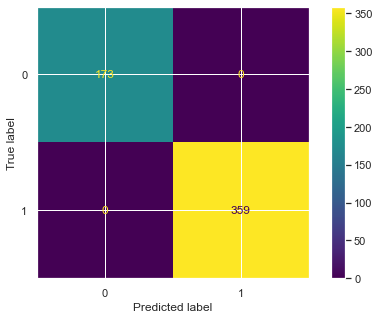

In [74]:
fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_predict),
    display_labels=[0,1],
)

cmp.plot(ax=ax);